<a href="https://colab.research.google.com/github/devphillipe/resolucao-challenge-alura-store/blob/main/Resolu%C3%A7%C3%A3o_Challenge_Alura_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importa√ß√£o dos dados



In [65]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

#1. An√°lise do faturamento


In [54]:
import pandas as pd

# URLs dos arquivos CSV
files = [
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv", "Loja 1"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv", "Loja 2"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv", "Loja 3"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv", "Loja 4")
]

# Lista para armazenar os DataFrames
dataframes = []

# Ler os arquivos e adicionar ID e nome da loja
for idx, (url, loja_nome) in enumerate(files, start=1):
    df = pd.read_csv(url)
    df["ID_Loja"] = idx
    df["Nome_Loja"] = loja_nome
    dataframes.append(df)

# Concatenar os dados em um √∫nico DataFrame
df_consolidado = pd.concat(dataframes, ignore_index=True)
df_consolidado.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  ID_Loja Nome_Loja  
0    cartao_credito                       8 -22.19 -48.79        1    Loja 1  
1    cartao_credito                       4 -22.25 -42.66        1    Loja 1  
2    cartao_credito                       1 -15.83 -47.86        1    Loja 1  
3            boleto                       1 -30.17 -53.50        1    Loja 1  
4            boleto                       1 -18.10 -44.38        1    Loja 1

In [56]:
# Calcular o faturamento de cada loja (pre√ßo + frete)
df_consolidado["Faturamento"] = df_consolidado["Pre√ßo"] + df_consolidado["Frete"]

# Agrupar por loja e somar o faturamento
faturamento_lojas = df_consolidado.groupby(["ID_Loja", "Nome_Loja"])["Faturamento"].sum().reset_index()

# Formatar para moeda BRL
faturamento_lojas["Faturamento (BRL)"] = faturamento_lojas["Faturamento"].apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

faturamento_lojas[["ID_Loja", "Nome_Loja", "Faturamento (BRL)"]]


ID_Loja Nome_Loja Faturamento (BRL)
0        1    Loja 1   R$ 1.616.347,09
1        2    Loja 2   R$ 1.567.773,22
2        3    Loja 3   R$ 1.542.047,69
3        4    Loja 4   R$ 1.458.253,46

#Gr√°fico de Pizza - Faturamento por Loja

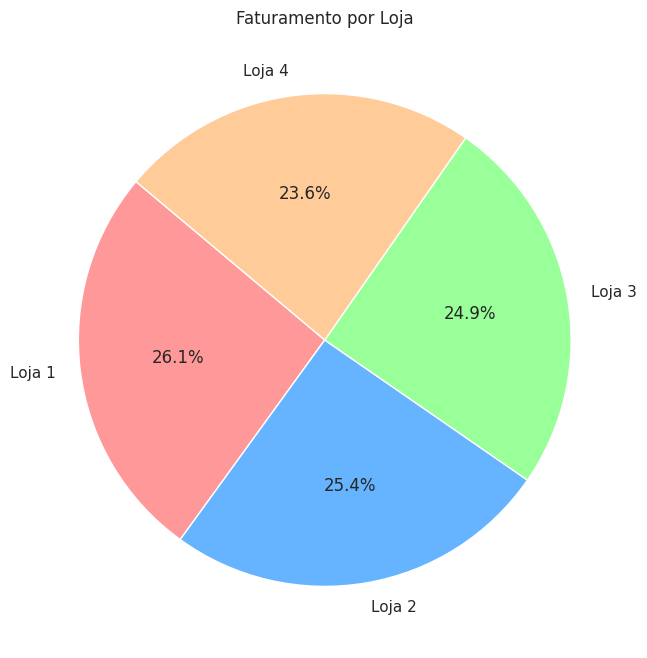

In [66]:
# Gr√°fico de Pizza - Faturamento por Loja
plt.figure(figsize=(8, 8))
plt.pie(faturamento_lojas["Faturamento"], labels=faturamento_lojas["Nome_Loja"], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Faturamento por Loja')
plt.show()


# 2. Vendas por Categoria


In [60]:
# Calcular o faturamento
df_consolidado["Faturamento"] = df_consolidado["Pre√ßo"] + df_consolidado["Frete"]

# Agrupar por categoria e somar o faturamento
vendas_por_categoria = df_consolidado.groupby("Categoria do Produto")["Faturamento"].sum().reset_index()

# Formatar para moeda BRL
vendas_por_categoria["Faturamento (BRL)"] = vendas_por_categoria["Faturamento"].apply(
    lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
)

# Ordenar do maior para o menor
vendas_por_categoria = vendas_por_categoria.sort_values(by="Faturamento", ascending=False)

# Exibir resultado
vendas_por_categoria[["Categoria do Produto", "Faturamento (BRL)"]]


Categoria do Produto Faturamento (BRL)
2            eletronicos   R$ 2.332.048,08
1       eletrodomesticos   R$ 1.860.198,66
6                 moveis   R$ 1.064.149,77
4  instrumentos musicais     R$ 489.701,48
3        esporte e lazer     R$ 200.891,94
0             brinquedos     R$ 103.502,36
7  utilidades domesticas      R$ 80.921,72
5                 livros      R$ 53.007,43

#Gr√°fico de Barras - Vendas por Categoria

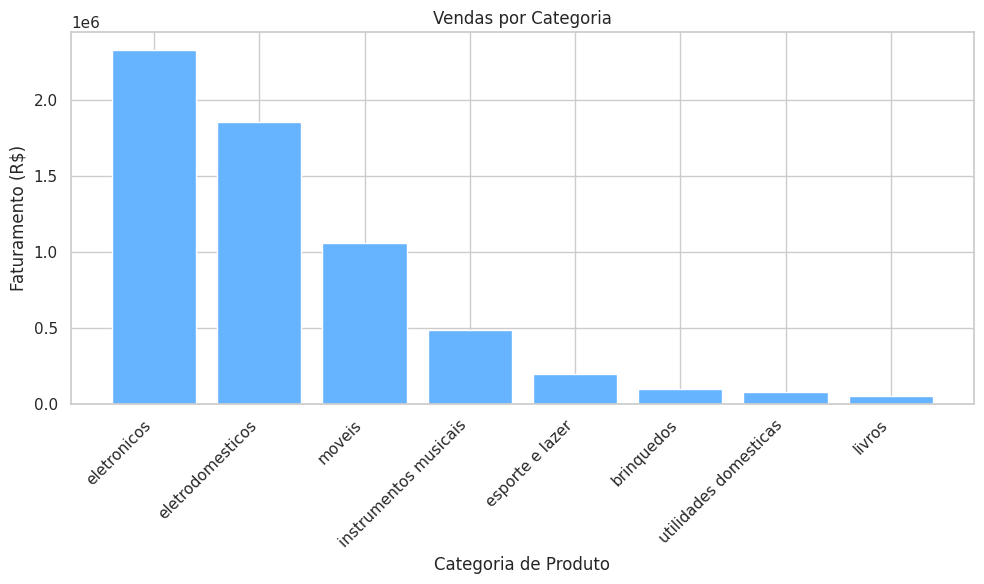

In [68]:
# Gr√°fico de Barras - Vendas por Categoria
plt.figure(figsize=(10, 6))
plt.bar(vendas_por_categoria["Categoria do Produto"], vendas_por_categoria["Faturamento"], color='#66b3ff')
plt.xlabel('Categoria de Produto')
plt.ylabel('Faturamento (R$)')
plt.title('Vendas por Categoria')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. M√©dia de Avalia√ß√£o das Lojas

In [61]:

# Converter coluna de avalia√ß√£o para num√©rica, caso esteja como string
df_consolidado["Avalia√ß√£o da compra"] = pd.to_numeric(df_consolidado["Avalia√ß√£o da compra"], errors='coerce')

# Agrupar por loja e calcular a m√©dia da avalia√ß√£o
media_avaliacoes = df_consolidado.groupby(["ID_Loja", "Nome_Loja"])["Avalia√ß√£o da compra"].mean().reset_index()

# Arredondar para duas casas decimais
media_avaliacoes["M√©dia de Avalia√ß√£o"] = media_avaliacoes["Avalia√ß√£o da compra"].round(2)

# Exibir apenas o necess√°rio
media_avaliacoes = media_avaliacoes[["ID_Loja", "Nome_Loja", "M√©dia de Avalia√ß√£o"]]
media_avaliacoes


ID_Loja Nome_Loja  M√©dia de Avalia√ß√£o
0        1    Loja 1                3.98
1        2    Loja 2                4.04
2        3    Loja 3                4.05
3        4    Loja 4                4.00

# 4. Produtos Mais e Menos Vendidos

In [62]:
# Contar quantas vezes cada produto foi vendido
vendas_por_produto = df_consolidado["Produto"].value_counts().reset_index()
vendas_por_produto.columns = ["Produto", "Quantidade de Vendas"]

# Produto mais vendido
mais_vendido = vendas_por_produto.iloc[0]

# Produto menos vendido (pode haver empates, pega o √∫ltimo da lista)
menos_vendido = vendas_por_produto.iloc[-1]

# Mostrar os resultados
print("üîù Produto Mais Vendido:")
print(mais_vendido)
print("\nüîª Produto Menos Vendido:")
print(menos_vendido)


üîù Produto Mais Vendido:
Produto                 C√¥moda
Quantidade de Vendas       210
Name: 0, dtype: object

üîª Produto Menos Vendido:
Produto                 Celular ABXY
Quantidade de Vendas             157
Name: 50, dtype: object


# 5. Frete M√©dio por Loja


In [63]:

# Garantir que a coluna Frete est√° como n√∫mero
df_consolidado["Frete"] = pd.to_numeric(df_consolidado["Frete"], errors="coerce")

# Calcular o frete m√©dio por loja
frete_medio = df_consolidado.groupby(["ID_Loja", "Nome_Loja"])["Frete"].mean().reset_index()

# Arredondar para 2 casas decimais
frete_medio["Frete M√©dio (R$)"] = frete_medio["Frete"].round(2)

# Exibir apenas o necess√°rio
frete_medio = frete_medio[["ID_Loja", "Nome_Loja", "Frete M√©dio (R$)"]]
frete_medio


ID_Loja Nome_Loja  Frete M√©dio (R$)
0        1    Loja 1             34.69
1        2    Loja 2             33.62
2        3    Loja 3             33.07
3        4    Loja 4             31.28

#Gr√°fico de Linhas - Frete M√©dio por Loja

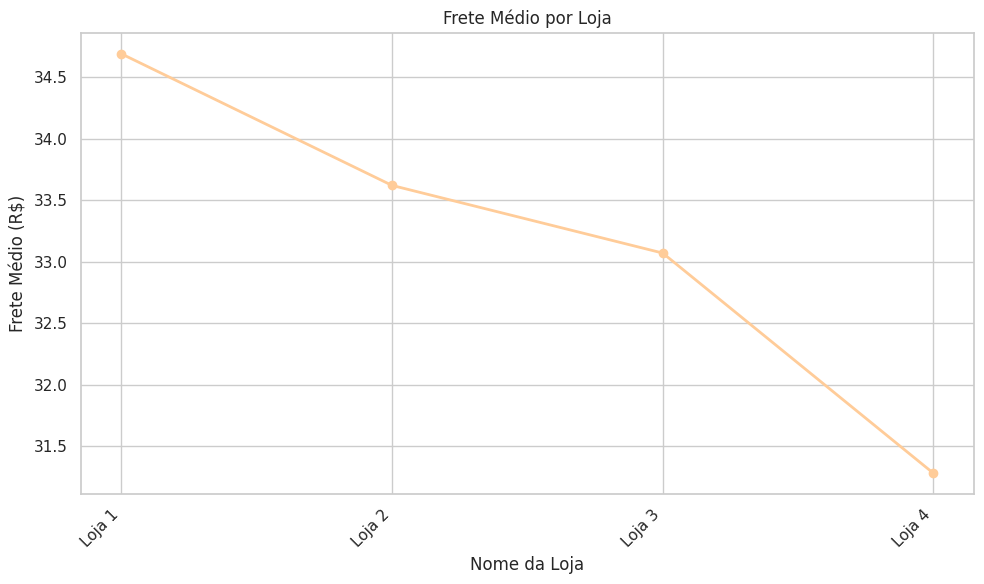

In [70]:
# Gr√°fico de Linhas - Frete M√©dio por Loja
plt.figure(figsize=(10, 6))
plt.plot(frete_medio["Nome_Loja"], frete_medio["Frete M√©dio (R$)"], marker='o', color='#ffcc99', linestyle='-', linewidth=2)
plt.xlabel('Nome da Loja')
plt.ylabel('Frete M√©dio (R$)')
plt.title('Frete M√©dio por Loja')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Qual loja vender?

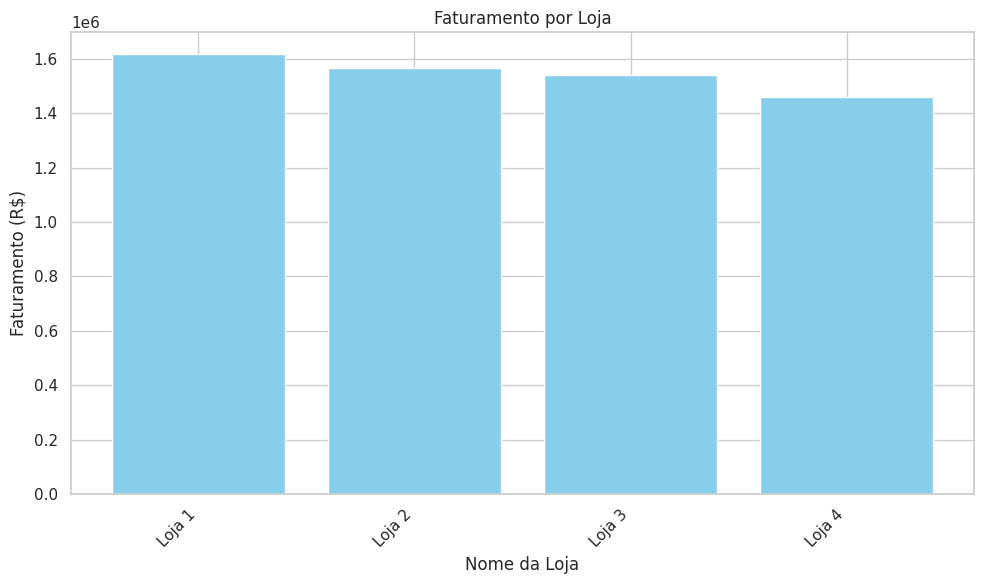

Nome_Loja Faturamento (BRL)  Avalia√ß√£o da compra Frete M√©dio (BRL)
0    Loja 1   R$ 1.616.347,09                  4.0          R$ 34,69
1    Loja 2   R$ 1.567.773,22                  4.0          R$ 33,62
2    Loja 3   R$ 1.542.047,69                  4.0          R$ 33,07
3    Loja 4   R$ 1.458.253,46                  4.0          R$ 31,28

In [79]:
# 1. Faturamento por loja
faturamento_lojas = df_consolidado.groupby(
    ["ID_Loja", "Nome_Loja"]
)["Faturamento"].sum().reset_index()

# 2. M√©dia de avalia√ß√£o por loja (arredondando para 1 casa decimal)
media_avaliacoes = df_consolidado.groupby(
    ["ID_Loja", "Nome_Loja"]
)["Avalia√ß√£o da compra"].mean().reset_index()
media_avaliacoes["Avalia√ß√£o da compra"] = media_avaliacoes["Avalia√ß√£o da compra"].round(1)

# 3. Frete m√©dio por loja
frete_medio = df_consolidado.groupby(
    ["ID_Loja", "Nome_Loja"]
)["Frete"].mean().reset_index()

# Unir tudo
analise_lojas = (
    faturamento_lojas
    .merge(media_avaliacoes, on=["ID_Loja", "Nome_Loja"])
    .merge(frete_medio, on=["ID_Loja", "Nome_Loja"])
    .sort_values(by="Faturamento", ascending=False)
)

# Formatar colunas em BRL (strings)
analise_lojas["Faturamento (BRL)"] = analise_lojas["Faturamento"] \
    .apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
analise_lojas["Frete M√©dio (BRL)"] = analise_lojas["Frete"] \
    .apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

# --- Gr√°fico corrigido usando a coluna num√©rica ---
plt.figure(figsize=(10, 6))
plt.bar(
    analise_lojas["Nome_Loja"],
    analise_lojas["Faturamento"],      # aqui usamos o valor num√©rico original
    color='skyblue'
)
plt.xlabel('Nome da Loja')
plt.ylabel('Faturamento (R$)')
plt.title('Faturamento por Loja')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Mostrar a tabela formatada
analise_lojas[
    ["Nome_Loja", "Faturamento (BRL)", "Avalia√ß√£o da compra", "Frete M√©dio (BRL)"]
]


#Conclus√£o
Embora a Loja 4 tenha o menor frete m√©dio, o que √© um aspecto positivo, ela apresenta o menor faturamento entre as lojas analisadas (R$ 1.458.253,46), o que √© um indicador de um desempenho inferior. Al√©m disso, a avalia√ß√£o m√©dia de 4,0 √© a mesma em todas as lojas, o que n√£o apresenta uma vantagem competitiva significativa em termos de satisfa√ß√£o do cliente.

Portanto, com base no desempenho financeiro observado, recomendamos que o Sr. Jo√£o considere vender a Loja 4, direcionando seus recursos e esfor√ßos para um novo neg√≥cio com maior potencial de crescimento e retorno.